In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [78]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [79]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [80]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [81]:
# Base.metadata.drop_all(engine)

In [82]:
# Base.metadata.create_all(engine)


In [83]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
station= Base.classes.station
measurement= Base.classes.measurement

# print(station)
# print(measurement)

In [85]:
# Create our session (link) from Python to the DB
session=Session(engine)
# print(session)

# Exploratory Precipitation Analysis

In [86]:
# Find the most recent date in the data set.

# mostrecentd= session.query(measurement.date).order_by(measurement.date).last()
# mostrecentd

mostrecentd= session.query(func.max(measurement.date)).first()
mostrecentd


('2017-08-23')

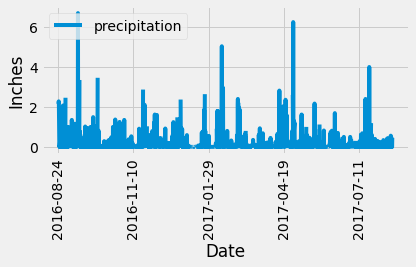

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year=dt.date(2017,8,23)-dt.timedelta(days=365)
# previous_year

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date,measurement.prcp).filter(measurement.date>previous_year).all()
# results
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=["date","precipitation"])
# df.set_index("date",inplace=True)


# df=df.set_index

# Sort the dataframe by date
df=df.sort_values("date")
df.head()
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x="date",y="precipitation",rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")

plt.tight_layout()
plt.show()



# df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('stock', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()

In [88]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number stations in the dataset
totalstations=session.query(func.count(station.station)).all()
totalstations

[(9)]

In [91]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
var=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
var

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Grab the most active station
most_active_station=session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).first()
most_active_station
# most_active= most_active_station[0]
# most_active
# most_active= var[0]
# most_active

('USC00519281')

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempdatamostactive= session.query(measurement.station, func.min(measurement.tobs),func.max(measurement.tobs),\
                     func.avg(measurement.tobs),func.count(measurement.tobs)).filter(measurement.station=="USC00519281").all()
tempdatamostactive

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Perform a query to retrieve the data and precipitation scores
# resultstob=session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date>previous_year).all()
# resultstob

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(measurement.tobs).filter(measurement.station==most_active).\
    filter(measurement.date>=previous_year).all()
temp_data

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [67]:
temp_df=pd.DataFrame(temp_data,columns=["tobs"])
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


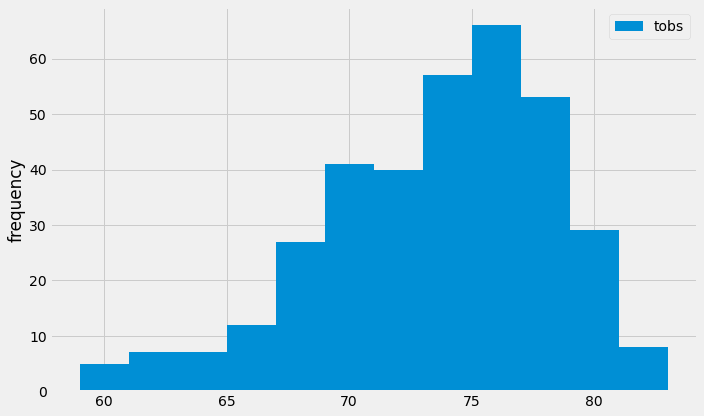

In [75]:
# create the plot
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("frequency")
plt.legend(["tobs"])

# Save the plot
plt.tight_layout()
plt.savefig("frequecy.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()